El número de personas que entran a un cibercafé entre las 19 y las 20 hs tiene distribución de Poisson. El dueño del local está evaluando la posibilidad de eliminar una terminal, lo cual hará si la media de clientes en ese horario es menor a 25. Para verificar si esto ocurre, durante 30 dı́as cuenta la cantidad de personas que van a su negocio en dicho horario y ve que el promedio muestral es de 24 personas.

    1) Determinar una región de rechazo de nivel asintótico 0.05 para las hipótesis

$$[H_0: \lambda = 25 \text{ vs } H_1: \lambda < 25]$$

    2) hallar el p-valor para la muestra dada. Qué decisión se toma en base a los datos que obtuvo?

    3) cuál es la probabilidad de que el dueño decida no eliminar una terminal si en realidad la media verdadera de usuarios es de 24.5 personas?

    4) cuántos dı́as deberı́a observar lo que ocurre en su local para obtener que la proba- bilidad calculada en b) sea a lo sumo del \(0.05\)?



### 1
$$(X_i\sim P(\lambda)$$
$$(\lambda) \text{es la verdadera media (desconocida) de clientes que entran al cibercafé entre las 19 y las 20 hs.}$$
$$Si (X_i\sim P(\lambda)) y (n) \text{es grande, se tiene} [ \frac{\bar{X}-\lambda}{\sqrt{\lambda  n}} \stackrel{a}{\sim} N(0,1) ]$$
$\text{En este caso, bajo (H_0),}$

$$[ \frac{\bar{X}-25}{\sqrt{25 / 30}} \stackrel{a}{\sim} N(0,1) ]$$

$ \text{El estadístico del test es}$

$$[ Z=\frac{\bar{X}-25}{\sqrt{25 / 30}} ]$$


$\text{Región de rechazo de nivel \(0.05\):}$

$$[R = \left\{ \frac{\bar{X}-25}{\sqrt{25 / 30}} < -z_{0.05} \right\}]$$

$$[ = \left\{ \frac{\bar{X}-25}{\sqrt{25 / 30}} < -1.64 \right\} ]$$

$\text{Calculo (Z_{obs}}$

$$[Z_{obs}= \frac{ 24 - 25}{\sqrt{25/30}} =-1.095]$$


### 2
$$ p-valor: (P(Z\leq Z_{\hbox{obs}}))=pnorm((Z_{\hbox{obs}})) $$

$$ p-valor (= P( Z < -1.095) = 0.14) $$ 



In [3]:
pnorm(-1.095)

[1] 0.1367583

Como el p-valor>\(0.05\), No rechazo \(H_0\) a nivel \(0.05\)

No hay evidencia, a nivel \(0.05\) de que el número medio de personas que entran al cibercafé entre las 19 y las 20 hs sea menor a 25


### 3

    Esto es la probabilidad de no rechazar \(H_0\) cuando en realidad es falsa, o sea la probabilidad de error tipo 2.

$[P_{24.5} \left( \frac{\bar{X}-25}{\sqrt{25 / 30}} > -1.64 \right) = P_{24.5} \left( \bar{X}> -1.64 \sqrt{25 / 30} +25 \right)] [= P_{24.5} \left( \frac{\bar{X}-24.5}{\sqrt{24.5 / 30}} > \frac{-1.64\sqrt{25 / 30} +25 -24.5}{\sqrt{24.5 / 30}} \right) ]$

$[ \approx 1 - \Phi\left(\frac{-1.64\sqrt{25 / 30} +25 -24.5}{\sqrt{24.5 / 30}} \right)]$



In [6]:
1- pnorm((-1.64* sqrt(25 / 30) + 25 - 24.5)/sqrt(24.5 / 30))

[1] 0.8650661

### 4
Probabilidad de error de tipo 2 en función de \(n\)

$[\text{p_n} =1- \Phi\left(\frac{-1.64 \sqrt{25 / n} +25 -24.5}{\sqrt{24.5 / n}} \right)]$

$[=1 -\Phi\left(-1.64\frac{\sqrt{25 }}{\sqrt{24.5}} + \frac{25 -24.5}{\sqrt{24.5 / n}} \right)]$

Debo hallar \(n\) para que esta probabilidad sea menor que \(0.05\)

$[1- \Phi\left(-1.64\frac{\sqrt{25 }}{\sqrt{24.5}} + \frac{25 -24.5}{\sqrt{24.5 / n}} \right) <0.05 ] [ \Phi\left(-1.64\frac{\sqrt{25 }}{\sqrt{24.5}} + \frac{25 -24.5}{\sqrt{24.5 / n}} \right) >0.95 ]$

$[ \frac{25 -24.5}{\sqrt{24.5 }}\sqrt{n} > \Phi^{-1}(0.95)+1.64\frac{\sqrt{25 }}{\sqrt{24.5}} ]$

$[\sqrt{n} > \left(\Phi^{-1}(0.95)+1.64\frac{\sqrt{25 }}{\sqrt{24.5}}\right) \frac{\sqrt{24.5 }}{25 -24.5} = 32.68]$

In [11]:
raizn <- (qnorm(0.95) +1.64 * 5/sqrt(24.5)) * sqrt(24.5)/(  (25-24.5))
raizn

[1] 32.68322

In [12]:
raizn^2

[1] 1068.193

In [13]:
n <- ceiling(raizn^2)
n

[1] 1069

Hace falta observar al menos 1069 días.

In [16]:
# Con R tmb podemos hacerlo facilmente

error_tipo_2 <- function(n){
1- pnorm((-1.64* sqrt(25 / n) + 25 - 24.5)/sqrt(24.5 / n))
}
f <- function(n){
  error_tipo_2(n)-0.05
}
uniroot(f, interval = c(30,1500))

$root
[1] 1068.193

$f.root
[1] 6.581553e-10

$iter
[1] 9

$init.it
[1] NA

$estim.prec
[1] 6.103516e-05

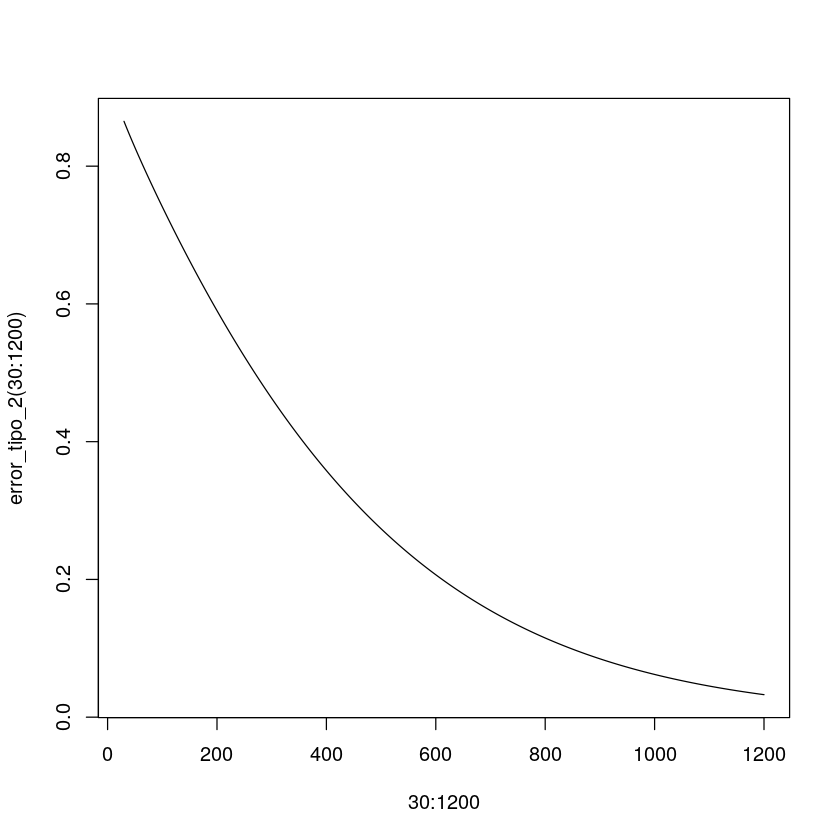

In [15]:
plot(30:1200, error_tipo_2(30:1200), type="l")